In [90]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import altair as alt
import scipy.stats
from decimal import Decimal

In [12]:
df_full = pd.read_csv('diamonds.csv')
df = df_full.sample(n=500, random_state=8) 
df.sample(n=5, random_state=8)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
15714,15715,0.36,Premium,G,SI2,59.3,59.0,608,4.66,4.62,2.75
978,979,0.81,Ideal,G,SI2,62.2,57.0,2894,5.96,6.00,3.72
24334,24335,2.02,Very Good,J,SI1,59.8,59.9,12598,8.16,8.21,4.90
16282,16283,1.53,Premium,H,SI2,61.5,60.0,6512,7.46,7.39,4.56
27876,27877,0.40,Ideal,G,SI2,61.8,56.0,654,4.75,4.77,2.94


# Soal 1: Scatter Plot

Buatlah scatterplot menggunakan Seaborn dari data df di atas, variasikan menggunakan palette yang telah disediakan sehingga didapatkan output sesuai expected.

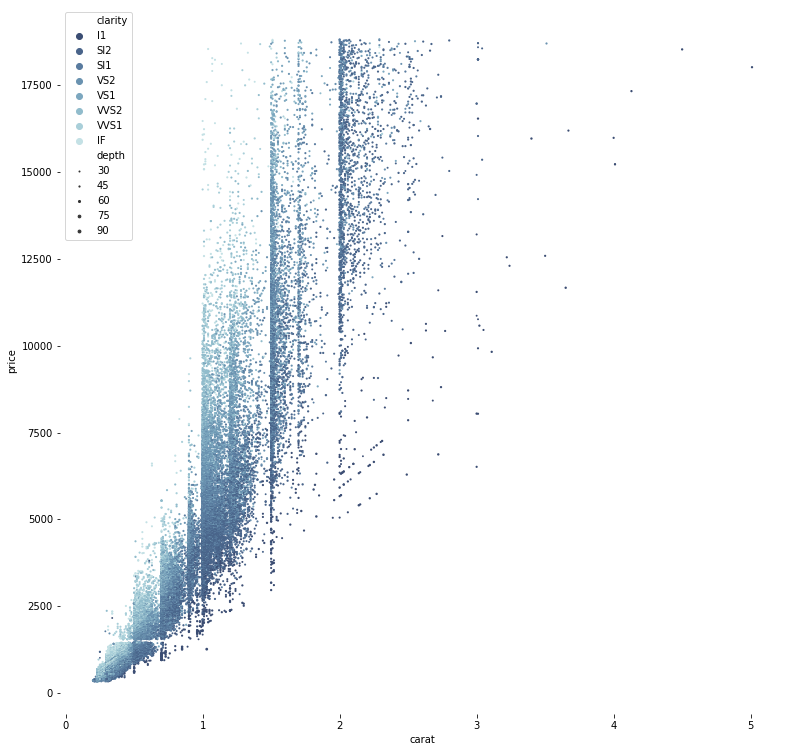

In [13]:
fig, ax = plt.subplots(figsize=(13, 13))
palette="ch:r=-.2,d=.3_r"
sns.despine(fig, left=True, bottom=True)
clarity_ranking = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]
sns.scatterplot(x="carat", y="price",hue="clarity", size="depth", palette=palette, hue_order=clarity_ranking, sizes=(1, 8), linewidth=0,
                data=df_full, ax=ax)
#code here

Expected Output:

![alt text](https://drive.google.com/uc?id=1OyzNnrnkJ7TL8DIyh_2O97WuzesyLL7W)

# Soal 2: Facet Grid

Gunakan fungsi hexbin berikut untuk diterapkan pada mapping dari facetgridnya sehingga dihasilkan output sesuai expected.

```
def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=15, cmap=cmap, **kwargs)
```


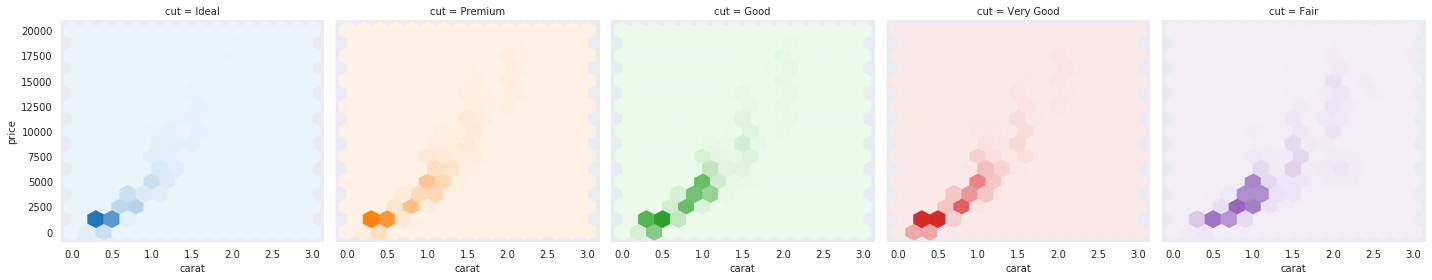

In [14]:
#code here

def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=15, cmap=cmap, **kwargs)


with sns.axes_style("dark"):
    a = sns.FacetGrid(df_full, hue="cut", col="cut", height=4)
a.map(hexbin, "carat", "price", extent=[0, 3.0, 0, 20000]);

Expected Output:

![alt text](https://drive.google.com/uc?id=1ZG6Uu0R_8mPAjpwublowrdUM6Hd1OXkI)

# Soal 3: Pair Plot

Ambil 300 data secara acak dari df, kemudian buat pair plotnya dari 300 data tersebut untuk kolom carat, depth, table, dan price sehingga dihasilkan output sesuai expected.

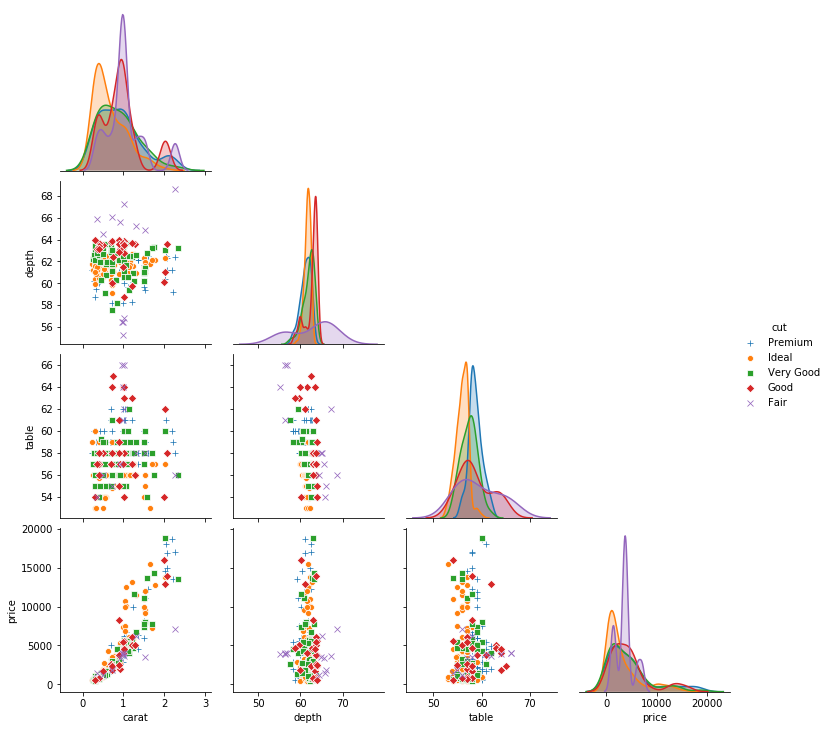

In [15]:
df2 = df_full.sample(n=300, random_state=123)
ga = sns.pairplot(df2, hue="cut", height=2.5, vars=["carat","depth","table","price"],corner=True,markers=["+", "o", "s", "D", "x"])
ga
#code here

Expected Output:

![alt text](https://drive.google.com/uc?id=1N3guRLAn5sIhfzzKFdvf1cZpmtEc-cw9)

# Soal 4: Joint Plot

Gunakan data yang sama dengan soal 3 untuk menghasilkan dua visualisasi joint plot antara carat dan price nya sesuai expected output.

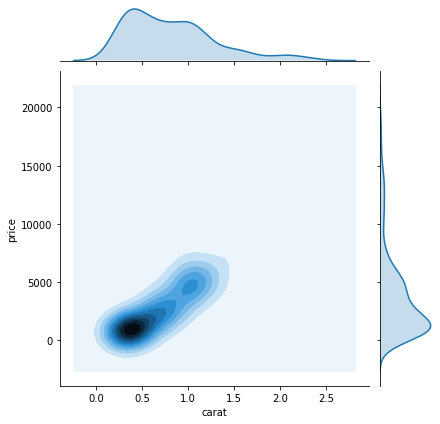

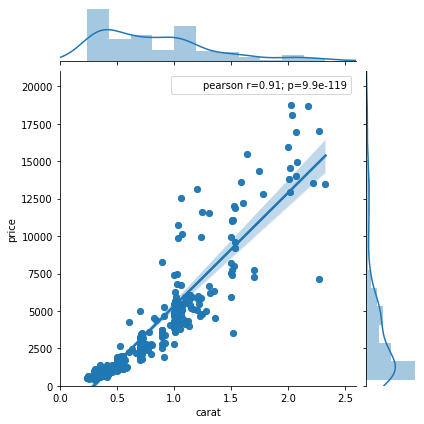

In [114]:
#code here
a = sns.jointplot(x=df2["carat"],y=df2["price"],kind="kde")
a

b = sns.jointplot(x=df2["carat"],y=df2["price"],kind="reg",xlim=(0,2.6),ylim=(0,21000))
sns.regplot(x=df2["carat"], y=df2["price"], data=df2, ax=b.ax_joint)
c = scipy.stats.linregress(df2["carat"], df2["price"])
r = c.rvalue
r2 = r.round(2)
pv = c.pvalue
phantom, = b.ax_joint.plot([], [], linestyle="", alpha=0)
b.ax_joint.legend([phantom],['pearson r={:.2f}; p={:.1e}'.format(r2,Decimal(pv))],loc="upper right")

Expected Output 1:

![alt text](https://drive.google.com/uc?id=1xX5Jq38-rr_oFD-eDRbBYCBA24Nmw2C5)

Expected Output 2:

![alt text](https://drive.google.com/uc?id=1QXY89CXRe1BzU0k7OBrr2fTn8WwIhWHo)